#### Research Questions : 
Does number of subscribers depend on: number of reviews, price, number of lectures, content_duration?

How does the level of a course (e.g., beginner, intermediate, advanced) impact its popularity? Do certain levels attract more subscribers? 

How does the paid vs. free course model impact the number of subscribers? Do paid courses have more or fewer subscribers compared to free courses?

Can we identify any differences in the popularity of courses based on their content categories (e.g., technology, business, arts)? Are certain categories more popular than others?

Are there any outliers or exceptional cases within the dataset that exhibit unusual subscriber counts, reviews, or other metrics? Can we identify any factors that contribute to their success or failure?

Can we identify any specific course topics or titles that are associated with higher subscriber counts or greater popularity? Are there any specific keywords or themes that consistently attract more learners?

### Question 1: Does number of subscribers depend on: number of reviews, price, number of lectures, content_duration?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv('udemy_courses.csv')
df = df.drop(['course_id', 'url', 'published_timestamp'], axis=1)
df.head(5)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,Business Finance
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,Business Finance
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,Business Finance
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,Business Finance


In [10]:
corr_df = df.drop(['course_title', 'is_paid', 'level', 'subject'], axis=1)
print("Correlation Matrix: \n")
corr_df.corr()

Correlation Matrix: 



,price,num_subscribers,num_reviews,num_lectures,content_duration
price,1.000000,0.050769,0.113696,0.330160,0.293450
num_subscribers,0.050769,1.000000,0.649946,0.157746,0.161839
num_reviews,0.113696,0.649946,1.000000,0.243029,0.228889
num_lectures,0.330160,0.157746,0.243029,1.000000,0.801647
content_duration,0.293450,0.161839,0.228889,0.801647,1.000000


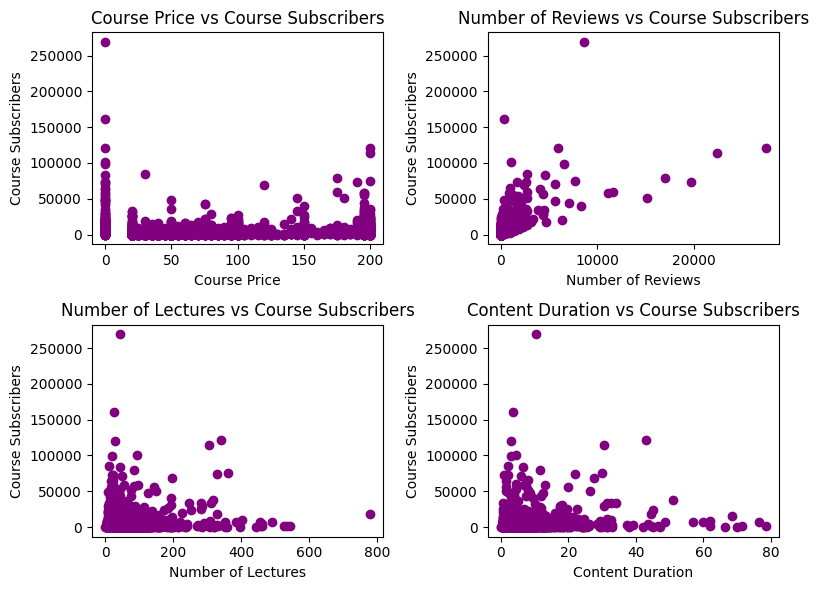

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

# Scatter plot 1
axes[0, 0].scatter(df['price'], df['num_subscribers'], c='purple')
axes[0, 0].set_xlabel('Course Price')
axes[0, 0].set_ylabel('Course Subscribers')
axes[0, 0].set_title('Course Price vs Course Subscribers')

# Scatter plot 2
axes[0, 1].scatter(df['num_reviews'], df['num_subscribers'], c='purple')
axes[0, 1].set_xlabel('Number of Reviews')
axes[0, 1].set_ylabel('Course Subscribers')
axes[0, 1].set_title('Number of Reviews vs Course Subscribers')

# Scatter plot 3
axes[1, 0].scatter(df['num_lectures'], df['num_subscribers'], c='purple')
axes[1, 0].set_xlabel('Number of Lectures')
axes[1, 0].set_ylabel('Course Subscribers')
axes[1, 0].set_title('Number of Lectures vs Course Subscribers')

# Scatter plot 4
axes[1, 1].scatter(df['content_duration'], df['num_subscribers'], c='purple')
axes[1, 1].set_xlabel('Content Duration')
axes[1, 1].set_ylabel('Course Subscribers')
axes[1, 1].set_title('Content Duration vs Course Subscribers')

plt.tight_layout()
plt.show()


A correlation coefficient of 0.649946 (from the correlation matrix) indicates a moderate positive correlation between the number of reviews and the number of subscribers. The scatter plot also shows a positive relationship, it further supports the conclusion of a positive association between these two variables.

Based on these findings, we can conclude that there is a moderate positive relationship between the number of reviews and the number of subscribers in the Udemy dataset we analyzed. This means that as the number of reviews increases, the number of subscribers tends to increase as well. In conclusion, the analysis suggests that a higher number of reviews is associated with a larger number of subscribers, indicating the potential influence of positive reviews on course popularity and learner engagement.Other factors such as price, number of lectures and content duration are not so important when making considerations about the courses to choose. It's essential to recognize that accessibility and affordability are multifaceted. Learners consider various aspects when deciding to enroll in a course, including their perceived value, the reputation of the course or platform, and the relevance of the course content to their learning goals.

### Question 2: How does the level of a course impact its popularity? Do certain levels attract more subscribers?

Number of subscribers in each course level: 
 level
All Levels            6915076
Beginner Level        4051843
Expert Level            50196
Intermediate Level     742005
Name: num_subscribers, dtype: int64


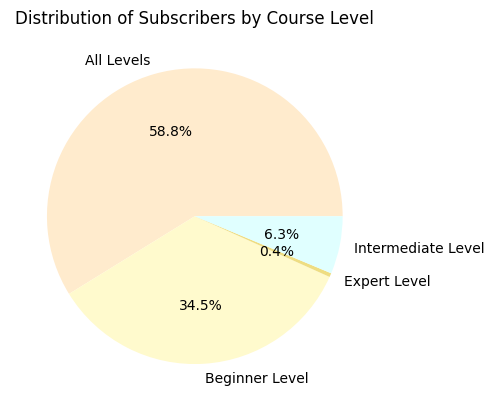

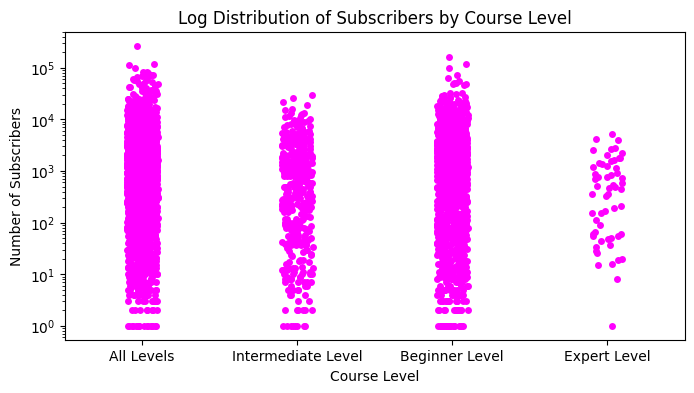

In [89]:
print("Number of subscribers in each course level: \n", df.groupby('level')['num_subscribers'].sum())

df_subscribers_by_level = df.groupby('level')['num_subscribers'].sum()
colors = [ '#FFEBCD','#FFFACD', '#EEDD82', '#E0FFFF', '#F0FFF0']
plt.pie(df_subscribers_by_level, labels=df_subscribers_by_level.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Subscribers by Course Level')
plt.show()

# A strip plot or swarm plot
plt.figure(figsize=(8, 4))
sn.stripplot(x='level', y='num_subscribers', data=df, c="magenta")

plt.xlabel('Course Level')
plt.ylabel('Number of Subscribers')
plt.yscale('log')
plt.title('Log Distribution of Subscribers by Course Level')
plt.show()

In [82]:
# Kruskal-Wallis test: a non-parametric test suitable for comparing multiple independent groups with unequal sample sizes.

# Null Hypothesis (H₀): The level of a course does not have an impact on its popularity. 
# There is no significant difference in the number of subscribers among different course levels.

# Alternative Hypothesis (H₁): The level of a course does have an impact on its popularity. 
# There is a significant difference in the number of subscribers among different course levels.

all_levels_group = df[df['level'] == 'All Levels']['num_subscribers']
beginner_group = df[df['level'] == 'Beginner Level']['num_subscribers']
intermediate_group = df[df['level'] == 'Intermediate Level']['num_subscribers']
expert_group = df[df['level'] == 'Expert Level']['num_subscribers']

statistic, p_value = stats.kruskal(all_levels_group, beginner_group, intermediate_group, expert_group)

alpha = 0.05

print("Results from Kruskals Wallis Test (p_value = )  ", p_value)
if p_value < alpha:
    print("Reject the null hypothesis which states that there is no significant difference in popularity among course levels.")
else:
    print("Accept the alternate hypothesis which states that there is a significant difference in the number of subscribers among different course levels.")



Results from Kruskals Wallis Test (p_value = )   3.397318671539073e-07
Reject the null hypothesis which states that there is no significant difference in popularity among course levels.


Results from Kruskal-Wallis Test and the Swarm plot confirm the significance of the differences in subscriber count between the course levels. All levels, beginner level, and intermediate level courses are highly clustered, while the expert level courses are more widespread. Here are a few possible conclusions based on this observation:

Beginner or intermediate level courses: The high clustering of subscribers for these courses suggests that there is a relatively consistent level of interest or popularity among these courses. There is a broader appeal for introductory topics.

Expert level courses: The widespread distribution of subscribers for expert level courses suggests that these courses attract a diverse range of subscribers. It could indicate that the appeal of expert level courses is more niche or specialized, and the subscriber base may be more varied in terms of interests and prior knowledge.

### Question 3: How does the paid vs. free course model impact the number of subscribers? Do paid courses have more or fewer subscribers compared to free courses?

In [56]:
df.head(3)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,Business Finance
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,Business Finance
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,Business Finance


Number of paid and unpaid courses: 
 is_paid
False     310
True     3368
Name: course_title, dtype: int64


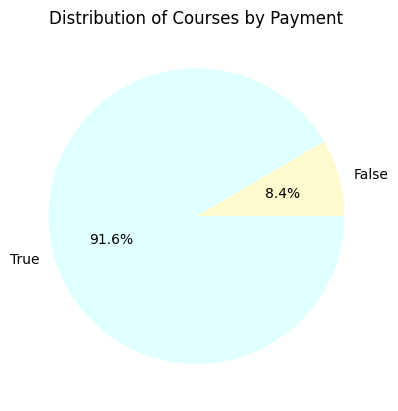

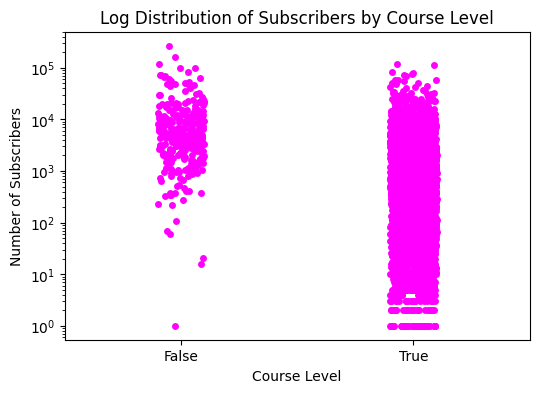

In [93]:
print("Number of paid and unpaid courses: \n", df.groupby('is_paid')['course_title'].count())

df_is_paid = df.groupby('is_paid')['course_title'].count()
colors = ['#FFFACD', '#E0FFFF']
plt.pie(df_is_paid, labels=df_is_paid.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Courses by Payment')
plt.show()

plt.figure(figsize=(6, 4))
sn.stripplot(x='is_paid', y='num_subscribers', data=df, c="magenta")

plt.xlabel('Course Level')
plt.ylabel('Number of Subscribers')
plt.yscale('log')
plt.title('Log Distribution of Subscribers by Course Level')
plt.show()

In [84]:
# Kruskal-Wallis test

# Null Hypothesis (H₀): Whether the course is paid or not does not have an impact on its popularity. 
# There is no significant difference in the number of subscribers depending upon if the course is paid or not.

# Alternative Hypothesis (H₁): Whether the course is paid or not has an impact on its popularity. 
# There is a significant difference in the number of subscribers.

is_paid_true_group = df[df['is_paid'] == True]['num_subscribers']
is_paid_false_group = df[df['is_paid'] == False]['num_subscribers']

statistic, p_value = stats.kruskal(is_paid_true_group, is_paid_false_group)

alpha = 0.05

print("Results from Kruskals Wallis Test (p_value = )  ", p_value)
if p_value < alpha:
    print("Reject the null hypothesis which states that there is no significant difference in popularity.")
else:
    print("Accept the alternate hypothesis which states that there is a significant difference in the number of subscribers.")



Results from Kruskals Wallis Test (p_value = )   4.06638138400913e-80
Reject the null hypothesis which states that there is no significant difference in popularity.


Based on the observation from the swarm plot, where the courses that are not paid (free courses) are less in number but have a higher range of subscriber counts compared to paid courses, we can draw the following conclusions:

1. Free courses: Despite being fewer in number, free courses tend to attract a wider range of subscribers. This suggests that the absence of a price barrier may make free courses more accessible and appealing to a larger audience. The higher subscriber counts for free courses across different ranges indicate a potentially larger user base.

2. Paid courses: Paid courses, although more numerous, have a narrower range of subscriber counts. This could be attributed to the fact that paid courses require users to make a financial commitment, which may limit their appeal to a specific subset of learners. The subscriber counts for paid courses may vary depending on factors such as the course quality, reputation, and marketing efforts.

Based on these observations, it appears that the paid vs. free course model impacts the number of subscribers. Free courses, despite their lower count, tend to have a broader reach and attract subscribers across a wider range of values. In contrast, paid courses have a more focused subscriber base, potentially driven by factors such as targeted marketing, course quality, or specific niche offerings.